In [130]:
import pandas as pd
import numpy as np

# data processing
from datetime import datetime, date, time
from dateutil.parser import parse

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# regression / matching
import statsmodels.formula.api as smf

## Load the data

In [131]:
data_path = "DATA/"

mex_df = pd.read_csv(data_path+"Mex_daily_edac.txt", sep='\t')
mex_offset_df = pd.read_csv(data_path+"MeX_EDAC_offset.txt", sep='\t')
nac_df = pd.read_csv(data_path+"Nac_daily_edac.txt", sep='\t')
ndm_df = pd.read_csv(data_path+"Ndm_daily_edac.txt", sep='\t')
ros_nac_offset_df = pd.read_csv(data_path+"Ros_AOCS_NAC_offset.txt", sep='\t')
ros_ndm_offset_df = pd.read_csv(data_path+"Ros_AOCS_NDM_offset.txt", sep='\t')
vex_df = pd.read_csv(data_path+"VEX_NDMW0D0A_2023_01_11_12_55_55.900.txt", sep='\t')
vex_boundary_df = pd.read_csv(data_path+"VEX-ICME-boundaries.csv")

## Venus Express data

In [132]:
vex_df.DATE_TIME.apply(lambda d: datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f'))
vex_df.set_index('DATE_TIME', inplace=True)
display(vex_df.head())

,NDMW0D0A
DATE_TIME,
2005-11-09 00:09:04.575,0
2005-11-09 00:10:08.575,0
2005-11-09 00:11:12.576,0
2005-11-09 00:12:16.576,0
2005-11-09 00:13:20.577,0


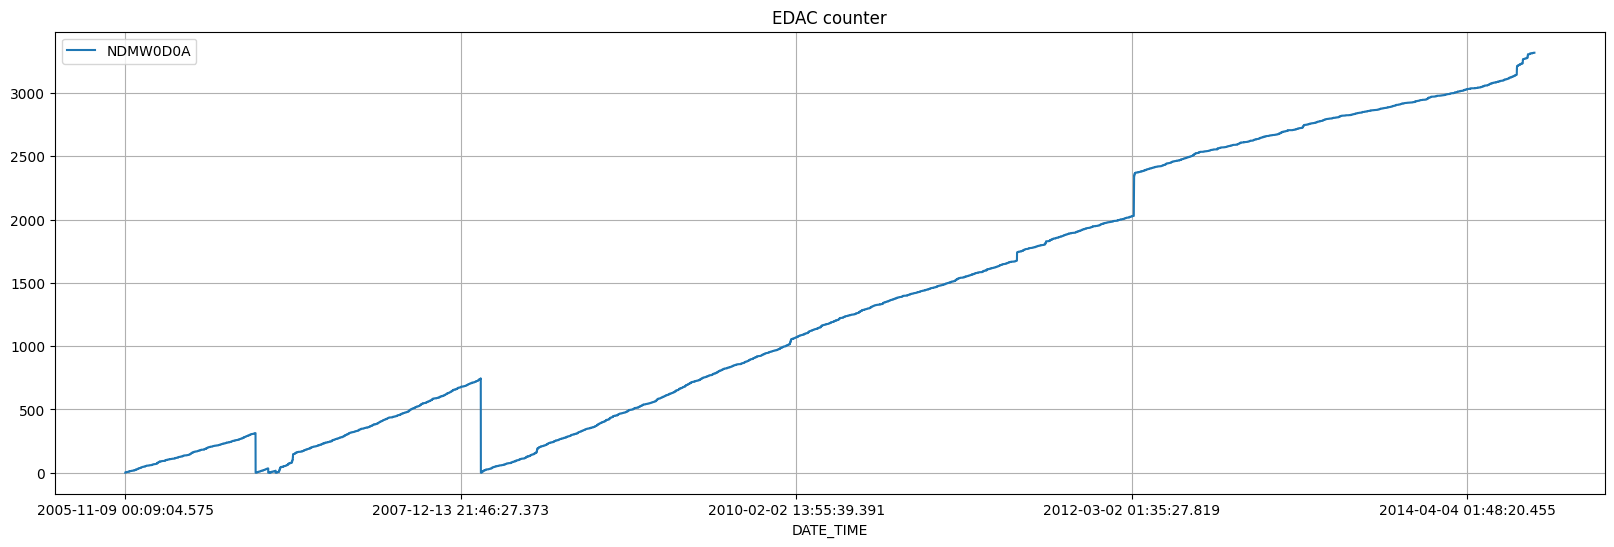

In [133]:
vex_df.plot(kind='line', figsize=(20,6))
plt.title('EDAC counter')
plt.grid()
plt.show()

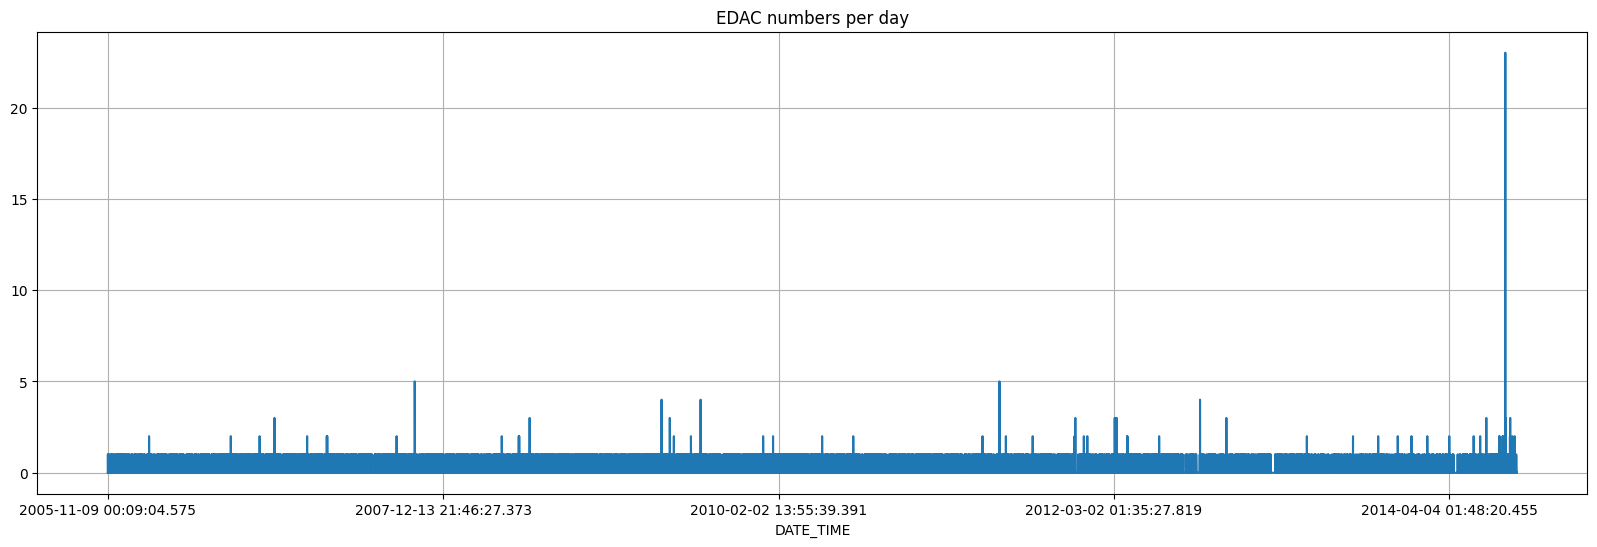

In [134]:
vex_df['EDAC'] = vex_df['NDMW0D0A'].diff().bfill().astype(int).map(lambda x: max(0, x))

vex_df['EDAC'].plot(kind='line', figsize=(20,6))
plt.title('EDAC numbers per day')
plt.grid()
plt.show()

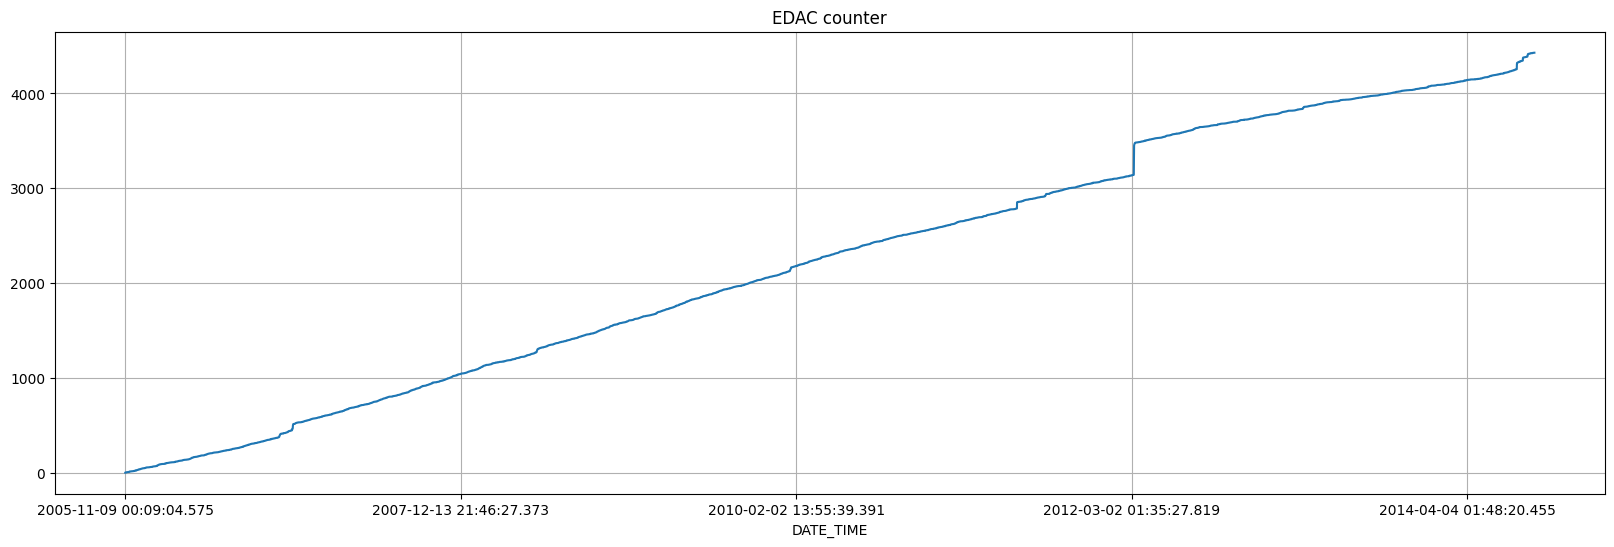

In [135]:
vex_df['EDAC_counter'] = vex_df['EDAC'].cumsum()

vex_df['EDAC_counter'].plot(kind='line', figsize=(20,6))
plt.title('EDAC counter')
plt.grid()
plt.show()